<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/Seattle/Regresi%C3%B3n%20Lineal/M%C3%BAltiple/Regresion_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6974]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6975]:
df = pd.read_csv("Seattle_Outliers_categorizacion.csv")
df.drop(["Unnamed: 0","price"], axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,(92 - 100%) Excelente,(2) Verificación moderada,4,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho
5,24/06/2024,city scrape,Amanda,within an hour,"['email', 'phone']",Whittier Heights,Entire guest suite,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,3,(2) Pocas camas,(5 - 7) Buen número de reseñas mensuales,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [6976]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,14942,2009,90.0,44.0,0.0,4,1,1,47.654440,-122.336290,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,30559,2009,98.0,98.0,1.0,10,1,1,47.550170,-122.319370,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,31481,2009,100.0,80.0,1.0,2,1,1,47.554950,-122.386630,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,31481,2009,100.0,80.0,1.0,2,1,1,47.556270,-122.386070,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,14942,2009,90.0,44.0,0.0,4,1,1,47.656080,-122.336020,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,130,1,1,47.676760,-122.358820,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,184675574,2018,100.0,99.0,0.0,4,1,1,47.665714,-122.289243,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,584875397,2024,97.6,92.3,0.0,1,0,1,47.531331,-122.374214,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,581629893,2024,72.0,100.0,0.0,6,1,1,47.509680,-122.256950,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [6977]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
corrTabla = abs(df.corr())
corrTabla

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
host_id,1.000000,0.954387,0.049385,0.012107,0.127371,0.058246,0.137371,0.050371,0.002927,0.026251,...,0.219205,0.053301,0.020815,0.066329,0.110127,0.021313,0.073733,0.003423,0.073717,0.008578
host_since,0.954387,1.000000,0.043327,0.020743,0.113552,0.027297,0.127985,0.064659,0.013473,0.022215,...,0.217018,0.066474,0.027812,0.053316,0.094332,0.030486,0.105068,0.000433,0.083775,0.017008
host_response_rate,0.049385,0.043327,1.000000,0.437661,0.156150,0.028887,0.021783,0.045886,0.027398,0.011404,...,0.074067,0.099370,0.022503,0.112656,0.068885,0.043855,0.636511,0.063487,0.036631,0.043324
host_acceptance_rate,0.012107,0.020743,0.437661,1.000000,0.261290,0.072198,0.003592,0.017677,0.036170,0.040369,...,0.170676,0.241717,0.067684,0.176829,0.119630,0.049397,0.544187,0.063756,0.088435,0.068942
host_is_superhost,0.127371,0.113552,0.156150,0.261290,1.000000,0.263793,0.064192,0.027942,0.014449,0.052926,...,0.328791,0.310284,0.116018,0.309824,0.144550,0.018720,0.191077,0.061731,0.091542,0.065799
host_listings_count,0.058246,0.027297,0.028887,0.072198,0.263793,1.000000,0.027382,0.071979,0.023190,0.010311,...,0.191231,0.118346,0.109290,0.194806,0.102419,0.002576,0.091880,0.079172,0.021660,0.013666
host_has_profile_pic,0.137371,0.127985,0.021783,0.003592,0.064192,0.027382,1.000000,0.147539,0.045705,0.035703,...,0.046763,0.036597,0.016901,0.007338,0.002419,0.001580,0.010437,0.023672,0.009381,0.062499
host_identity_verified,0.050371,0.064659,0.045886,0.017677,0.027942,0.071979,0.147539,1.000000,0.006179,0.014951,...,0.010324,0.024433,0.001264,0.017944,0.035855,0.018822,0.042220,0.030096,0.031443,0.042032
latitude,0.002927,0.013473,0.027398,0.036170,0.014449,0.023190,0.045705,0.006179,1.000000,0.138489,...,0.021432,0.040106,0.010312,0.051603,0.010119,0.133969,0.064397,0.021852,0.018877,0.595841
longitude,0.026251,0.022215,0.011404,0.040369,0.052926,0.010311,0.035703,0.014951,0.138489,1.000000,...,0.037493,0.067433,0.012173,0.079128,0.094204,0.107919,0.034560,0.087041,0.034135,0.009448


<Axes: >

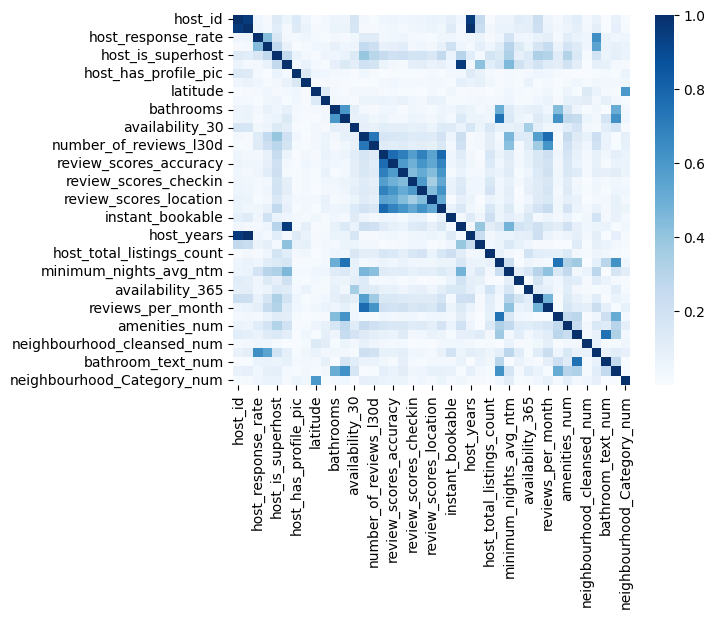

In [6978]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrTabla, cmap = 'Blues')
Heat_Map

In [6979]:
# Hacemos una copia para guardar las predicciones que tengamos en el df
dfPredict = df.copy()

## Regresión Multiple

## 1.- host_id

In [6980]:
# Filtrando las correlaciones fuertes
hostModel = abs(df.corr()['host_id'])
hostModel = hostModel[hostModel.abs() > 0.2].sort_values(ascending=False).to_frame()
hostModel

,host_id
host_id,1.000000
host_since,0.954387
host_years,0.954387
host_verifications_num,0.259546
number_of_reviews,0.219205


<Axes: >

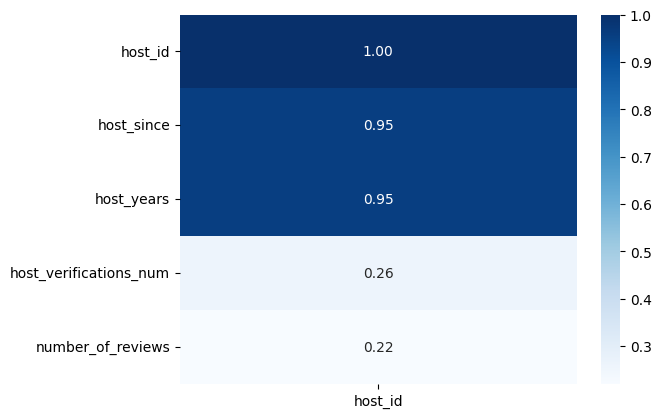

In [6981]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(hostModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

<Axes: xlabel='host_since', ylabel='host_id'>

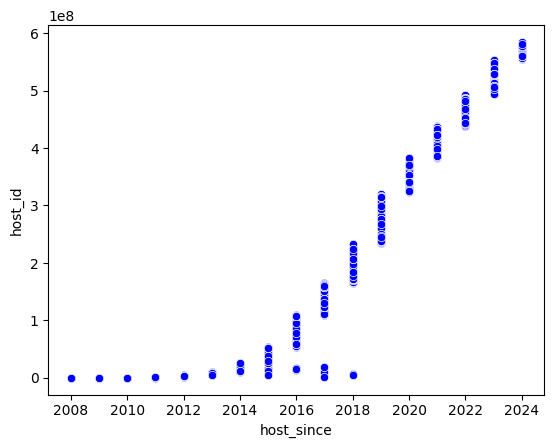

In [6982]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_since', y = 'host_id', color = 'blue', data = df)

In [6983]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["host_since","host_years","host_verifications_num"]] # Independiente = x
Var_Dep = df[["host_id"]] # Dependiente = y

# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_since', 'host_years', 'host_verifications_num'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[ 2.9038790e+19,  2.9038790e+19, -1.2581632e+07]]),
 'rank_': 3,
 'singular_': array([3.86272307e+02, 3.73057189e+01, 2.25882073e-12]),
 'intercept_': array([-5.87745109e+22])}

## Modelo matemático: y = 2.9038790e+19x1 +  2.9038790e+19x2 - 1.2581632e+07x3 - 5.87745109e+22

In [6984]:
# Predecimos los valores de "host_id" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["host_since","host_years","host_verifications_num"]])
y_pred

array([[-2.01326592e+08],
       [-2.01326592e+08],
       [-2.01326592e+08],
       ...,
       [ 5.20093696e+08],
       [ 5.36870912e+08],
       [ 3.77487360e+08]])

In [6985]:
# Insertamos la columna de predicciones en el df

dfPredict.insert(0, 'Predict_Host_id', y_pred)
dfPredict

,Predict_Host_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,-201326592.0,14942,2009,90.0,44.0,0.0,4,1,1,47.654440,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,-201326592.0,30559,2009,98.0,98.0,1.0,10,1,1,47.550170,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,-201326592.0,31481,2009,100.0,80.0,1.0,2,1,1,47.554950,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,-201326592.0,31481,2009,100.0,80.0,1.0,2,1,1,47.556270,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,-201326592.0,14942,2009,90.0,44.0,0.0,4,1,1,47.656080,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,377487360.0,398317720,2021,100.0,99.0,1.0,130,1,1,47.676760,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,226492416.0,184675574,2018,100.0,99.0,0.0,4,1,1,47.665714,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,520093696.0,584875397,2024,97.6,92.3,0.0,1,0,1,47.531331,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,536870912.0,581629893,2024,72.0,100.0,0.0,6,1,1,47.509680,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


<Axes: xlabel='host_since', ylabel='host_id'>

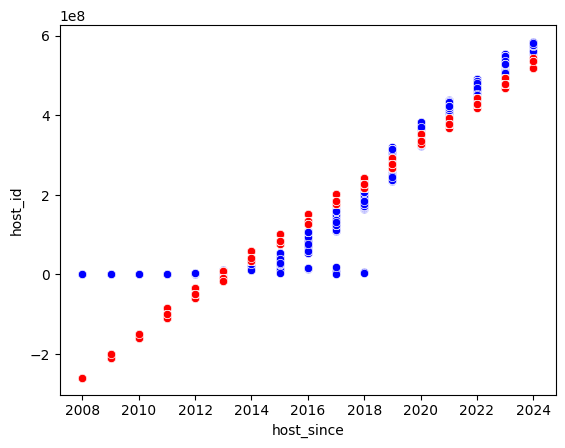

In [6986]:
# Gráfica de comparación
sns.scatterplot(x = 'host_since', y = 'host_id', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'host_since', y = 'Predict_Host_id', color = "red", data = dfPredict)

In [6987]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.9184841260969907

In [6988]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1

0.9583757749948559

## 2.- host_acceptance_rate

In [6989]:
# Filtrando las correlaciones fuertes
AcceptanceModel = abs(df.corr()['host_acceptance_rate'])
AcceptanceModel = AcceptanceModel[AcceptanceModel.abs() > 0.2].sort_values(ascending=False).to_frame()
AcceptanceModel

,host_acceptance_rate
host_acceptance_rate,1.000000
host_response_time_num,0.544187
host_response_rate,0.437661
minimum_nights_avg_ntm,0.299935
host_is_superhost,0.261290
number_of_reviews_ltm,0.256865
reviews_per_month,0.241717
number_of_reviews_l30d,0.217254
instant_bookable,0.200409


<Axes: >

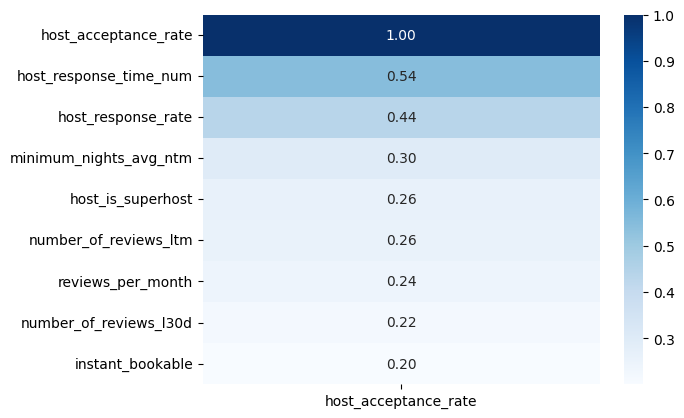

In [6990]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(AcceptanceModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='host_response_time_num', ylabel='host_acceptance_rate'>

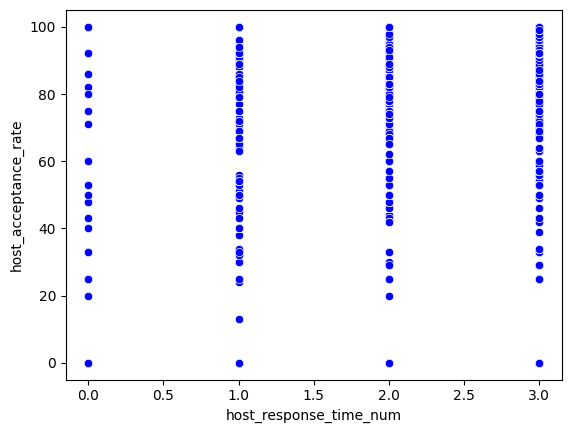

In [6991]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_time_num', y = 'host_acceptance_rate', color = 'blue', data = df)

In [6992]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["host_response_time_num","host_response_rate","minimum_nights_avg_ntm","host_is_superhost","number_of_reviews_ltm","reviews_per_month","number_of_reviews_l30d","instant_bookable"]] # Independiente = x
Var_Dep = df[["host_acceptance_rate"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_time_num', 'host_response_rate',
        'minimum_nights_avg_ntm', 'host_is_superhost',
        'number_of_reviews_ltm', 'reviews_per_month',
        'number_of_reviews_l30d', 'instant_bookable'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([[10.74494412,  0.24849048, -0.10821774,  3.83225115,  0.02600736,
          0.307367  ,  0.06538894,  4.44392161]]),
 'rank_': 8,
 'singular_': array([1926.48744103,  934.82057441,  832.09628494,  135.16964562,
          85.38652373,   40.17658087,   36.85193716,   30.19053117]),
 'intercept_': array([34.39965341])}

## Modelo matemático: y = 10.74494412x1 + 0.2484904x2 - 0.10821774x3 + 3.83225115x4 + 0.02600736x5 +  0.307367x6 + 0.06538894x7 +  4.44392161x8 + 34.39965341

In [6993]:
# Predecimos los valores de "host_id" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["host_response_time_num","host_response_rate","minimum_nights_avg_ntm","host_is_superhost","number_of_reviews_ltm","reviews_per_month","number_of_reviews_l30d","instant_bookable"]])
y_pred

array([[75.30364292],
       [84.73485834],
       [85.30262746],
       ...,
       [91.2178344 ],
       [89.40861747],
       [95.63564093]])

In [6994]:
# Insertamos la columna de predicciones en el df
dfPredict.insert(0, 'Predict_Host_Acceptance', y_pred)
dfPredict

,Predict_Host_Acceptance,Predict_Host_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,75.303643,-201326592.0,14942,2009,90.0,44.0,0.0,4,1,1,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,84.734858,-201326592.0,30559,2009,98.0,98.0,1.0,10,1,1,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,85.302627,-201326592.0,31481,2009,100.0,80.0,1.0,2,1,1,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,84.563177,-201326592.0,31481,2009,100.0,80.0,1.0,2,1,1,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,75.194646,-201326592.0,14942,2009,90.0,44.0,0.0,4,1,1,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,100.112028,377487360.0,398317720,2021,100.0,99.0,1.0,130,1,1,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,96.258133,226492416.0,184675574,2018,100.0,99.0,0.0,4,1,1,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,91.217834,520093696.0,584875397,2024,97.6,92.3,0.0,1,0,1,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,89.408617,536870912.0,581629893,2024,72.0,100.0,0.0,6,1,1,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [6995]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.3644949533071655

In [6996]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6037341743740912

<Axes: xlabel='host_response_time_num', ylabel='host_acceptance_rate'>

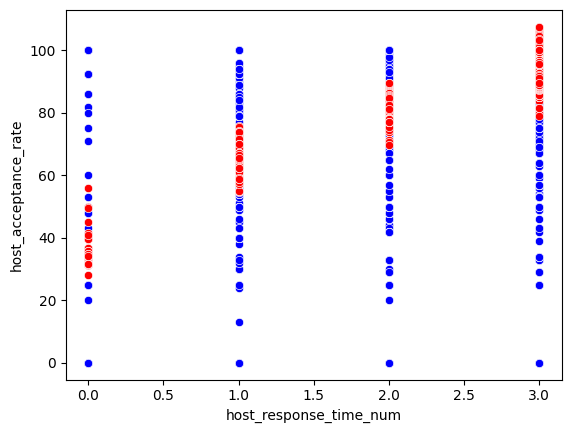

In [6997]:
# Gráfica de comparación
sns.scatterplot(x = 'host_response_time_num', y = 'host_acceptance_rate', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'host_response_time_num', y = 'Predict_Host_Acceptance', color = "red", data = dfPredict)

## 3.- host_is_superhost

In [6998]:
# Filtrando las correlaciones fuertes
SuperHostModel = abs(df.corr()['host_is_superhost'])
SuperHostModel = SuperHostModel[SuperHostModel.abs() > 0.2].sort_values(ascending=False).to_frame()
SuperHostModel

,host_is_superhost
host_is_superhost,1.000000
number_of_reviews_ltm,0.391552
number_of_reviews,0.328791
minimum_nights_avg_ntm,0.321623
reviews_per_month,0.310284
amenities_num,0.309824
calculated_host_listings_count,0.299152
number_of_reviews_l30d,0.290389
host_listings_count,0.263793
review_scores_value,0.262862


<Axes: >

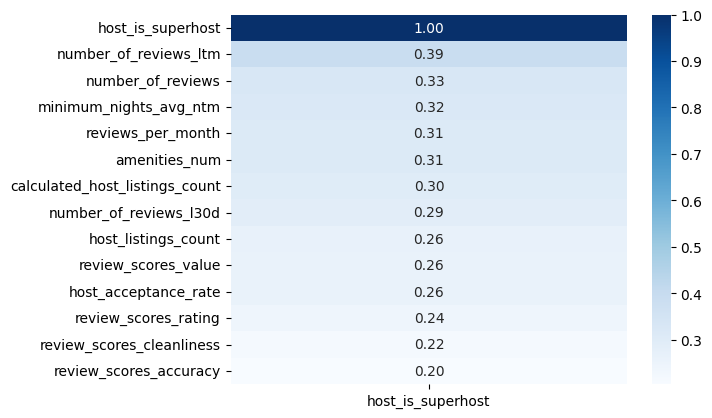

In [6999]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map3 = sns.heatmap(SuperHostModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map3

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

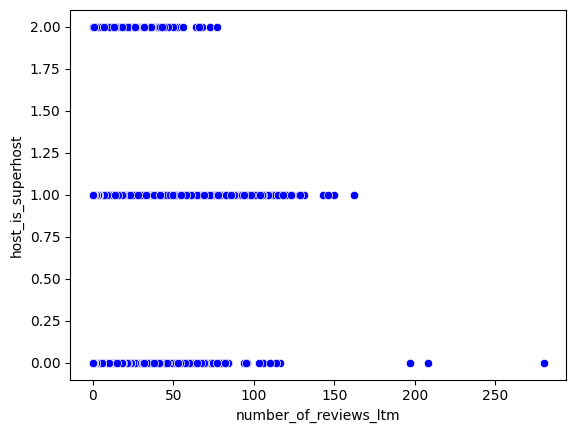

In [7000]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews_ltm', y = 'host_is_superhost', color = 'blue', data = df)

In [7001]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["number_of_reviews_ltm","number_of_reviews","minimum_nights_avg_ntm","reviews_per_month","amenities_num","calculated_host_listings_count","number_of_reviews_l30d","host_listings_count","review_scores_value","host_acceptance_rate","review_scores_rating","review_scores_cleanliness","review_scores_accuracy"]] # Independiente = x
Var_Dep = df[["host_is_superhost"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews',
        'minimum_nights_avg_ntm', 'reviews_per_month', 'amenities_num',
        'calculated_host_listings_count', 'number_of_reviews_l30d',
        'host_listings_count', 'review_scores_value',
        'host_acceptance_rate', 'review_scores_rating',
        'review_scores_cleanliness', 'review_scores_accuracy'],
       dtype=object),
 'n_features_in_': 13,
 'coef_': array([[ 4.70872964e-03,  7.15829689e-04, -3.65058706e-04,
         -5.72786130e-03,  5.76276580e-03, -1.82060058e-03,
         -4.06871847e-03,  3.91307982e-05,  1.24239746e-01,
          5.22119986e-03,  4.09668244e-02,  7.21157774e-02,
         -1.76632260e-02]]),
 'rank_': 13,
 'singular_': array([8.43854952e+04, 6.70439088e+03, 1.86510564e+03, 1.63775137e+03,
        1.22813691e+03, 1.05800687e+03, 7.66600304e+02, 1.34473033e+02,
        8.47146454e+01, 4.77496554e+01,

## Modelo matemático: y = 4.70872964e-03x1 + 7.15829689e-04x2 - 3.65058706e-04x3 - 5.72786130e-03x4 + 5.76276580e-03x5 - 1.82060058e-03x6 - 4.06871847e-03x7 + 3.91307982e-05x8 + 1.24239746e-01x9 + 5.22119986e-03x10 + 4.09668244e-02x11 + 7.21157774e-02x12 - 1.76632260e-02x13 - 1.32577617

In [7002]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["number_of_reviews_ltm","number_of_reviews","minimum_nights_avg_ntm","reviews_per_month","amenities_num","calculated_host_listings_count","number_of_reviews_l30d","host_listings_count","review_scores_value","host_acceptance_rate","review_scores_rating","review_scores_cleanliness","review_scores_accuracy"]])
y_pred

array([[0.26913697],
       [0.76723061],
       [0.70640712],
       ...,
       [0.45495135],
       [0.55334296],
       [0.57077787]])

In [7003]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_SuperHost', y_pred)
dfPredict

,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,0.269137,75.303643,-201326592.0,14942,2009,90.0,44.0,0.0,4,1,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,0.767231,84.734858,-201326592.0,30559,2009,98.0,98.0,1.0,10,1,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,0.706407,85.302627,-201326592.0,31481,2009,100.0,80.0,1.0,2,1,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,0.576015,84.563177,-201326592.0,31481,2009,100.0,80.0,1.0,2,1,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,0.142283,75.194646,-201326592.0,14942,2009,90.0,44.0,0.0,4,1,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,0.422817,100.112028,377487360.0,398317720,2021,100.0,99.0,1.0,130,1,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,0.369334,96.258133,226492416.0,184675574,2018,100.0,99.0,0.0,4,1,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,0.454951,91.217834,520093696.0,584875397,2024,97.6,92.3,0.0,1,0,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,0.553343,89.408617,536870912.0,581629893,2024,72.0,100.0,0.0,6,1,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7004]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.2965593450200269

In [7005]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.5445726260289135

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

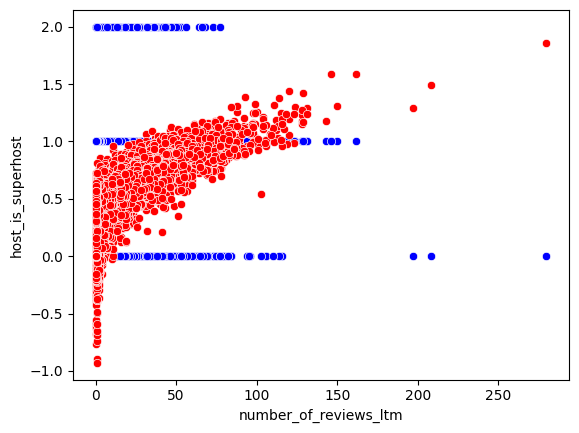

In [7006]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'host_is_superhost', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'Predict_SuperHost', color = "red", data = dfPredict)

## 4.- host_total_listings_count

In [7007]:
# Filtrando las correlaciones fuertes
hostTotalListings = abs(df.corr()['host_total_listings_count'])
hostTotalListings = hostTotalListings[hostTotalListings.abs() > 0.15].sort_values(ascending=False).to_frame()
hostTotalListings

,host_total_listings_count
host_total_listings_count,1.000000
instant_bookable,0.215839
availability_365,0.191022
host_is_superhost,0.183124
review_scores_communication,0.177330
review_scores_rating,0.157901
review_scores_value,0.157488


<Axes: >

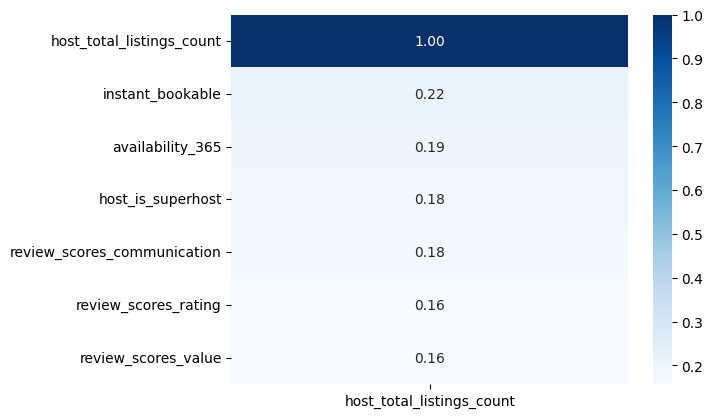

In [7008]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map4 = sns.heatmap(hostTotalListings, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map4

<Axes: xlabel='instant_bookable', ylabel='host_total_listings_count'>

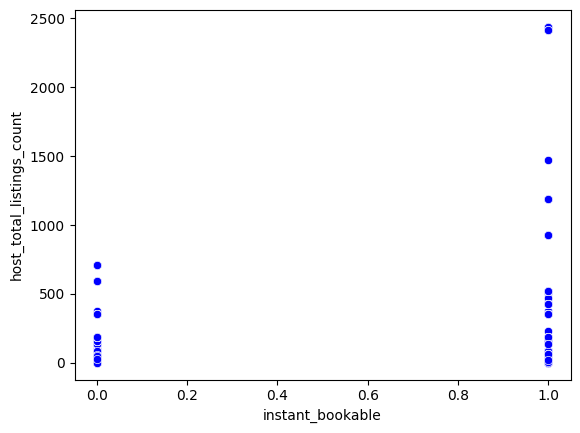

In [7009]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'instant_bookable', y = 'host_total_listings_count', color = 'blue', data = df)

In [7010]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["instant_bookable","availability_365","host_is_superhost","review_scores_communication","review_scores_rating","review_scores_value"]] # Independiente = x
Var_Dep = df[["host_total_listings_count"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable', 'availability_365', 'host_is_superhost',
        'review_scores_communication', 'review_scores_rating',
        'review_scores_value'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([[100.92144961,   0.30120999, -59.52138381, -87.99737549,
         -19.96427929,  -7.74476358]]),
 'rank_': 6,
 'singular_': array([9331.66569939,   49.74098458,   37.84452472,   36.08426628,
          16.97616452,   13.70939946]),
 'intercept_': array([581.88375625])}

## Modelo matemático: y =  100.92144961x1 + 0.30120999x2 - 59.52138381x3 - 87.99737549x4 - 19.96427929x5 - 7.74476358x6 + 581.88375625

In [7011]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["instant_bookable","availability_365","host_is_superhost","review_scores_communication","review_scores_rating","review_scores_value"]])
y_pred

array([[ 47.62953307],
       [ 45.33804746],
       [-16.10879061],
       ...,
       [ 54.85857285],
       [182.58771161],
       [-10.38580079]])

In [7012]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Host_TotalListings', y_pred)
dfPredict

,Predict_Host_TotalListings,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,47.629533,0.269137,75.303643,-201326592.0,14942,2009,90.0,44.0,0.0,4,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,45.338047,0.767231,84.734858,-201326592.0,30559,2009,98.0,98.0,1.0,10,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,-16.108791,0.706407,85.302627,-201326592.0,31481,2009,100.0,80.0,1.0,2,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,-55.868509,0.576015,84.563177,-201326592.0,31481,2009,100.0,80.0,1.0,2,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,8.171024,0.142283,75.194646,-201326592.0,14942,2009,90.0,44.0,0.0,4,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,142.343767,0.422817,100.112028,377487360.0,398317720,2021,100.0,99.0,1.0,130,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,112.104574,0.369334,96.258133,226492416.0,184675574,2018,100.0,99.0,0.0,4,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,54.858573,0.454951,91.217834,520093696.0,584875397,2024,97.6,92.3,0.0,1,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,182.587712,0.553343,89.408617,536870912.0,581629893,2024,72.0,100.0,0.0,6,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7013]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.11119607120053032

In [7014]:

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.3334607491152899

<Axes: xlabel='instant_bookable', ylabel='host_total_listings_count'>

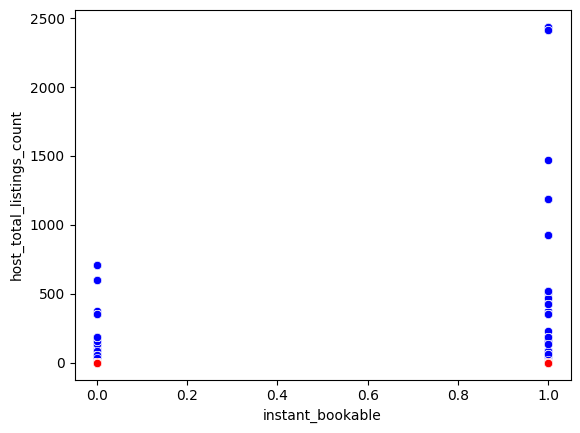

In [7015]:
# Gráfica de comparación
sns.scatterplot(x = 'instant_bookable', y = 'host_total_listings_count', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'instant_bookable', y = 'Predict_SuperHost', color = "red", data = dfPredict)

## 5.- room_type

In [7016]:
# Filtrando las correlaciones fuertes
roomTypeModel = abs(df.corr()['room_type_num'])
roomTypeModel = roomTypeModel[roomTypeModel.abs() > 0.30].sort_values(ascending=False).to_frame()
roomTypeModel

,room_type_num
room_type_num,1.000000
bathroom_text_num,0.751873
accommodates,0.372912
priceMex,0.325673


<Axes: >

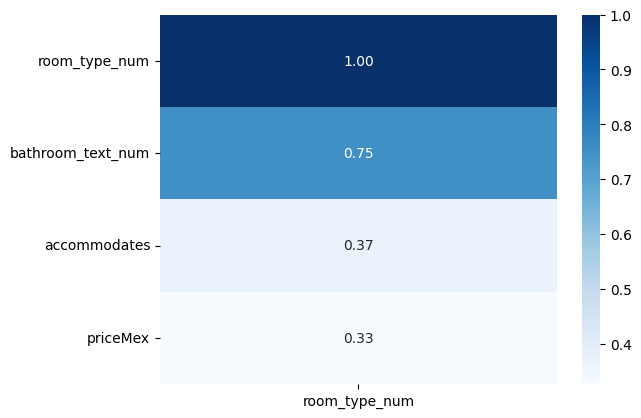

In [7017]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map5 = sns.heatmap(roomTypeModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map5

<Axes: xlabel='bathroom_text_num', ylabel='room_type_num'>

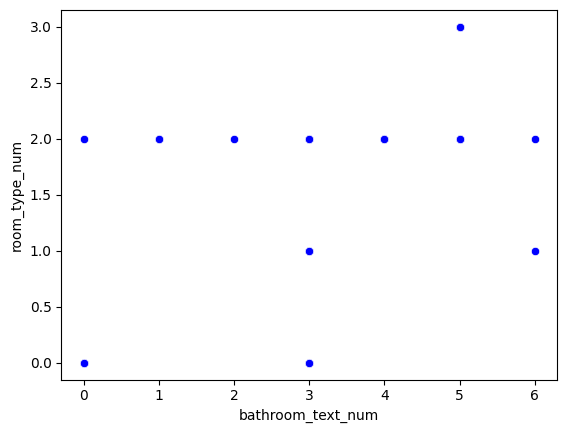

In [7018]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = "bathroom_text_num", y = 'room_type_num', color = 'blue', data = df)

In [7019]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["bathroom_text_num","accommodates","priceMex"]] # Independiente = x
Var_Dep = df[["room_type_num"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathroom_text_num', 'accommodates', 'priceMex'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[ 9.48501319e-01, -4.35886654e-02, -1.89321739e-05]]),
 'rank_': 3,
 'singular_': array([1.87247141e+05, 1.42654378e+02, 4.14846806e+01]),
 'intercept_': array([-2.43973646])}

## Modelo matemático: y =  9.48501319e-01x1 - 4.35886654e-02x2 -1.89321739e-05x3 - 2.43973646

In [7020]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["bathroom_text_num","accommodates","priceMex"]])
y_pred

array([[ 0.32552538],
       [ 2.18745467],
       [ 0.161438  ],
       ...,
       [ 0.14922012],
       [ 0.30378066],
       [-0.0157071 ]])

In [7021]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_RoomType', y_pred)
dfPredict

,Predict_RoomType,Predict_Host_TotalListings,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,0.325525,47.629533,0.269137,75.303643,-201326592.0,14942,2009,90.0,44.0,0.0,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,2.187455,45.338047,0.767231,84.734858,-201326592.0,30559,2009,98.0,98.0,1.0,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,0.161438,-16.108791,0.706407,85.302627,-201326592.0,31481,2009,100.0,80.0,1.0,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,0.228722,-55.868509,0.576015,84.563177,-201326592.0,31481,2009,100.0,80.0,1.0,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,0.169583,8.171024,0.142283,75.194646,-201326592.0,14942,2009,90.0,44.0,0.0,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,-0.295381,142.343767,0.422817,100.112028,377487360.0,398317720,2021,100.0,99.0,1.0,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,2.185233,112.104574,0.369334,96.258133,226492416.0,184675574,2018,100.0,99.0,0.0,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,0.149220,54.858573,0.454951,91.217834,520093696.0,584875397,2024,97.6,92.3,0.0,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,0.303781,182.587712,0.553343,89.408617,536870912.0,581629893,2024,72.0,100.0,0.0,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7022]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.5938450265106099

In [7023]:

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.7706134092465624

<Axes: xlabel='bathroom_text_num', ylabel='room_type_num'>

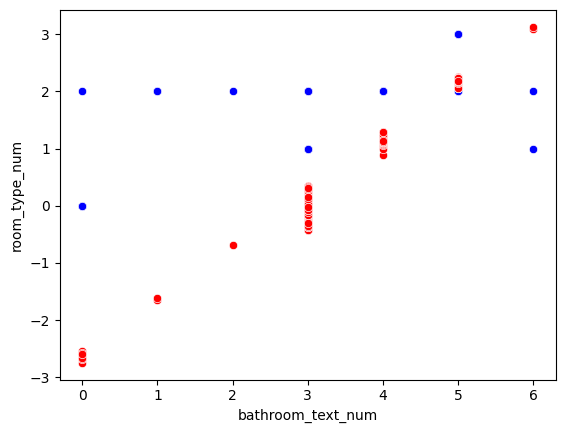

In [7024]:
# Gráfica de comparación
sns.scatterplot(x = 'bathroom_text_num', y = 'room_type_num', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'bathroom_text_num', y = 'Predict_RoomType', color = "red", data = dfPredict)

## 6.- accommodates

In [7025]:
# Filtrando las correlaciones fuertes
accomodatesModel = abs(df.corr()['accommodates'])
accomodatesModel = accomodatesModel[accomodatesModel.abs() > 0.30].sort_values(ascending=False).to_frame()
accomodatesModel

,accommodates
accommodates,1.000000
bedrooms,0.748922
beds,0.743644
priceMex,0.624201
bathrooms,0.500733
room_type_num,0.372912
amenities_num,0.322396


<Axes: >

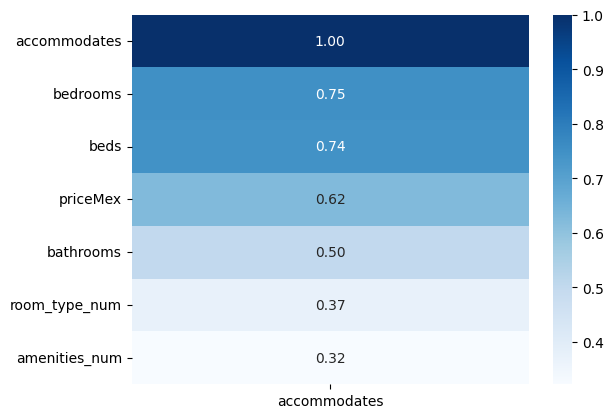

In [7026]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map6 = sns.heatmap(accomodatesModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map6

<Axes: xlabel='bedrooms', ylabel='accommodates'>

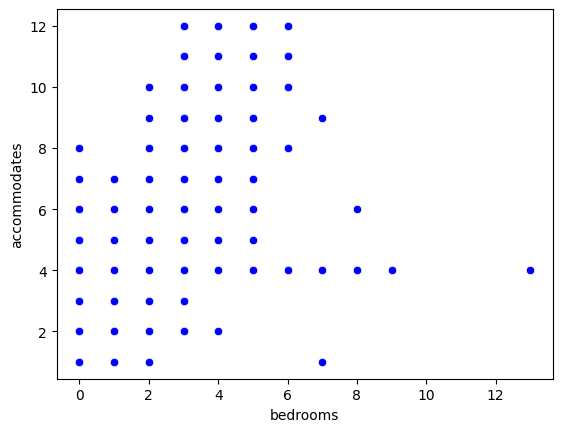

In [7027]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'bedrooms', y = 'accommodates', color = 'blue', data = df)

In [7028]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["bedrooms","beds","priceMex","bathrooms","room_type_num","amenities_num"]] # Independiente = x
Var_Dep = df[["accommodates"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'priceMex', 'bathrooms', 'room_type_num',
        'amenities_num'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([[ 7.01835027e-01,  7.12010140e-01,  1.18906075e-04,
          8.60587830e-02, -3.72345319e-01,  7.93143914e-03]]),
 'rank_': 6,
 'singular_': array([1.87247439e+05, 1.09851142e+03, 9.93749624e+01, 6.39550845e+01,
        5.44031187e+01, 4.42705606e+01]),
 'intercept_': array([0.56383771])}

## Modelo matemático: y = 7.01835027e-01x1 + 7.12010140e-01x2 + 1.18906075e-04x3 + 8.60587830e-02x4 - 3.72345319e-01x5 +  7.93143914e-03x6 + 0.56383771

In [7029]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["bedrooms","beds","priceMex","bathrooms","room_type_num","amenities_num"]])
y_pred

array([[2.52396032],
       [2.08826021],
       [5.128764  ],
       ...,
       [4.33030187],
       [1.95695932],
       [5.75608322]])

In [7030]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Accommodates', y_pred)
dfPredict

,Predict_Accommodates,Predict_RoomType,Predict_Host_TotalListings,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,host_id,host_since,host_response_rate,host_acceptance_rate,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,2.523960,0.325525,47.629533,0.269137,75.303643,-201326592.0,14942,2009,90.0,44.0,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,2.088260,2.187455,45.338047,0.767231,84.734858,-201326592.0,30559,2009,98.0,98.0,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,5.128764,0.161438,-16.108791,0.706407,85.302627,-201326592.0,31481,2009,100.0,80.0,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,4.220345,0.228722,-55.868509,0.576015,84.563177,-201326592.0,31481,2009,100.0,80.0,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,3.386162,0.169583,8.171024,0.142283,75.194646,-201326592.0,14942,2009,90.0,44.0,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,10.866541,-0.295381,142.343767,0.422817,100.112028,377487360.0,398317720,2021,100.0,99.0,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,1.644562,2.185233,112.104574,0.369334,96.258133,226492416.0,184675574,2018,100.0,99.0,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,4.330302,0.149220,54.858573,0.454951,91.217834,520093696.0,584875397,2024,97.6,92.3,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,1.956959,0.303781,182.587712,0.553343,89.408617,536870912.0,581629893,2024,72.0,100.0,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7031]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_6 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.7203723480777195

In [7032]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_6 = np.sqrt(coef_Deter_6)
coef_Correl_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.8487475172733759

<Axes: xlabel='bedrooms', ylabel='accommodates'>

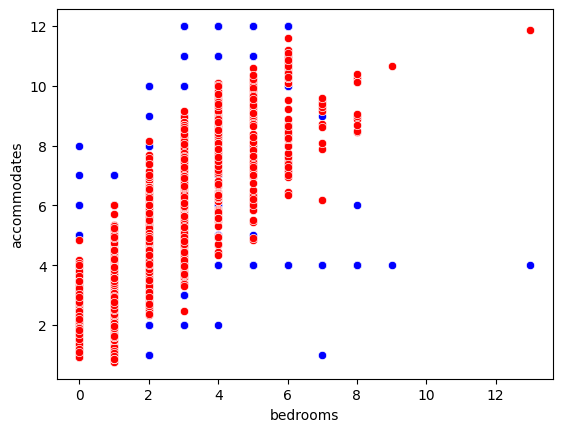

In [7033]:
# Gráfica de comparación
sns.scatterplot(x = 'bedrooms', y = 'accommodates', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'bedrooms', y = 'Predict_Accommodates', color = "red", data = dfPredict)

## 7.- bedrooms

In [7034]:
# Filtrando las correlaciones fuertes
bedroomsModel = abs(df.corr()['bedrooms'])
bedroomsModel = bedroomsModel[bedroomsModel.abs() > 0.30].sort_values(ascending=False).to_frame()
bedroomsModel

,bedrooms
bedrooms,1.000000
accommodates,0.748922
priceMex,0.625899
beds,0.619669
bathrooms,0.602778


<Axes: >

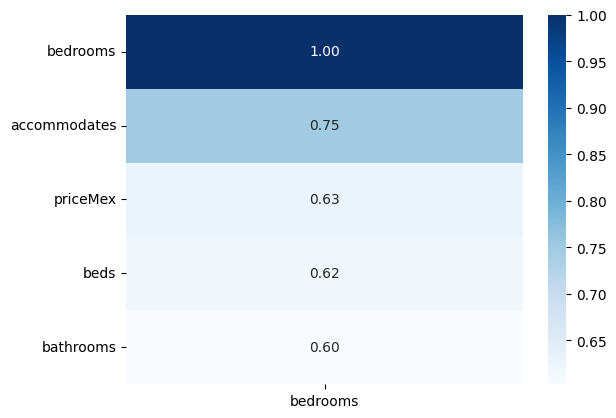

In [7035]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map7 = sns.heatmap(bedroomsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map7

<Axes: xlabel='accommodates', ylabel='bedrooms'>

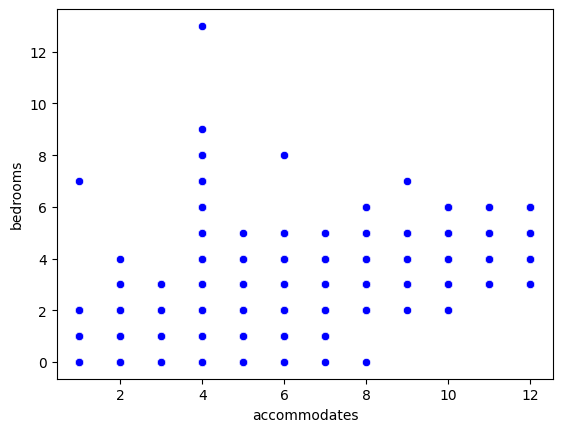

In [7036]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'accommodates', y = 'bedrooms', color = 'blue', data = df)

In [7037]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["accommodates","priceMex","beds","bathrooms"]] # Independiente = x
Var_Dep = df[["bedrooms"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'priceMex', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[2.38155687e-01, 8.83573115e-05, 8.05929214e-02, 3.79116114e-01]]),
 'rank_': 4,
 'singular_': array([1.87247151e+05, 1.55528841e+02, 6.15834334e+01, 5.22576541e+01]),
 'intercept_': array([-0.31576765])}

## Modelo matemático: y = 2.38155687e-01x1 + 8.83573115e-05x2 + 8.05929214e-02x3 + 3.79116114e-01x4 - 0.31576765

In [7038]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["accommodates","priceMex","beds","bathrooms"]])
y_pred

array([[0.55316036],
       [1.50980692],
       [1.58432567],
       ...,
       [1.75031219],
       [1.44760161],
       [2.85963682]])

In [7039]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_Bedrooms', y_pred)
dfPredict

,Predict_Bedrooms,Predict_Accommodates,Predict_RoomType,Predict_Host_TotalListings,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,host_id,host_since,host_response_rate,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,0.553160,2.523960,0.325525,47.629533,0.269137,75.303643,-201326592.0,14942,2009,90.0,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,1.509807,2.088260,2.187455,45.338047,0.767231,84.734858,-201326592.0,30559,2009,98.0,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,1.584326,5.128764,0.161438,-16.108791,0.706407,85.302627,-201326592.0,31481,2009,100.0,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,1.154991,4.220345,0.228722,-55.868509,0.576015,84.563177,-201326592.0,31481,2009,100.0,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,1.465719,3.386162,0.169583,8.171024,0.142283,75.194646,-201326592.0,14942,2009,90.0,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,5.373250,10.866541,-0.295381,142.343767,0.422817,100.112028,377487360.0,398317720,2021,100.0,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,0.761942,1.644562,2.185233,112.104574,0.369334,96.258133,226492416.0,184675574,2018,100.0,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,1.750312,4.330302,0.149220,54.858573,0.454951,91.217834,520093696.0,584875397,2024,97.6,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,1.447602,1.956959,0.303781,182.587712,0.553343,89.408617,536870912.0,581629893,2024,72.0,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7040]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)  (PROBAR CON VARIAS)
coef_Deter_7 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_7 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6508550006716828

In [7041]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_7 = np.sqrt(coef_Deter_7)
coef_Correl_7 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.8067558494809212

<Axes: xlabel='accommodates', ylabel='bedrooms'>

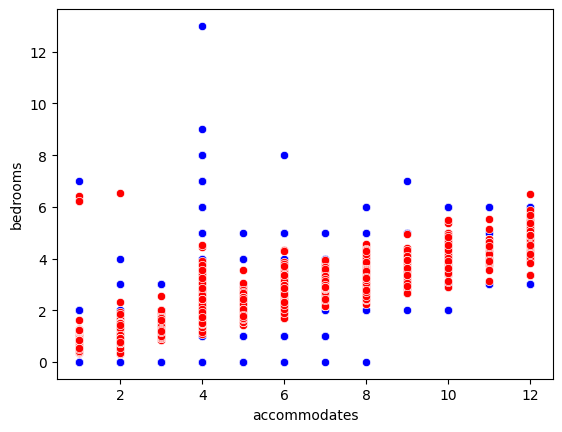

In [7042]:
# Gráfica de comparación
sns.scatterplot(x = 'accommodates', y = 'bedrooms', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'accommodates', y = 'Predict_Bedrooms', color = "red", data = dfPredict)

## 8.- priceMex

In [7043]:
# Filtrando las correlaciones fuertes
PriceModel = abs(df.corr()['priceMex'])
PriceModel = PriceModel[PriceModel.abs() > 0.20].sort_values(ascending=False).to_frame()
PriceModel

,priceMex
priceMex,1.000000
bedrooms,0.625899
accommodates,0.624201
beds,0.514203
bathrooms,0.506989
room_type_num,0.325673
amenities_num,0.297398
bathroom_text_num,0.261436


<Axes: >

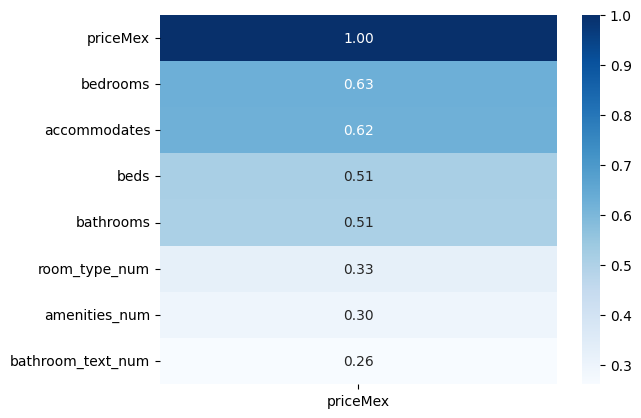

In [7044]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map8 = sns.heatmap(PriceModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map8

<Axes: xlabel='bedrooms', ylabel='priceMex'>

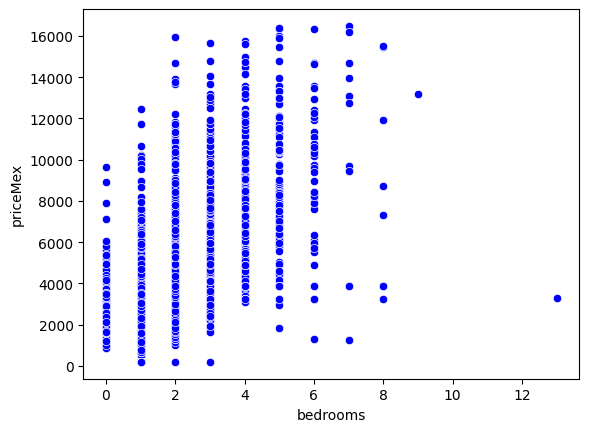

In [7045]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'bedrooms', y = 'priceMex', color = 'blue', data = df)

In [7046]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["bedrooms","accommodates","beds","bathrooms","room_type_num","amenities_num","bathroom_text_num"]] # Independiente = x
Var_Dep = df[["priceMex"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'accommodates', 'beds', 'bathrooms', 'room_type_num',
        'amenities_num', 'bathroom_text_num'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[ 504.44849332,  223.65505144,   74.35488005,  604.65014545,
         -282.18221326,   13.71479143, -289.91861102]]),
 'rank_': 7,
 'singular_': array([1152.74774068,  204.74727947,   70.63127085,   61.81420158,
          58.02282731,   44.7264058 ,   24.3201214 ]),
 'intercept_': array([1559.37257062])}

## Modelo matemático: y = 504.44849332x1 + 223.65505144x2 + 74.35488005x3 + 604.65014545x4 - 282.18221326x5 + 13.71479143x6 - 289.91861102x7 + 1559.37257062

In [7047]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["bedrooms","accommodates","beds","bathrooms","room_type_num","amenities_num","bathroom_text_num"]])
y_pred

array([[2494.45425919],
       [3112.36294722],
       [4284.88057543],
       ...,
       [4156.26619102],
       [3609.91142069],
       [5295.69644949]])

In [7048]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_priceMex', y_pred)
dfPredict

,Predict_priceMex,Predict_Bedrooms,Predict_Accommodates,Predict_RoomType,Predict_Host_TotalListings,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,host_id,host_since,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,2494.454259,0.553160,2.523960,0.325525,47.629533,0.269137,75.303643,-201326592.0,14942,2009,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,3112.362947,1.509807,2.088260,2.187455,45.338047,0.767231,84.734858,-201326592.0,30559,2009,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,4284.880575,1.584326,5.128764,0.161438,-16.108791,0.706407,85.302627,-201326592.0,31481,2009,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,3904.581895,1.154991,4.220345,0.228722,-55.868509,0.576015,84.563177,-201326592.0,31481,2009,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,3226.059502,1.465719,3.386162,0.169583,8.171024,0.142283,75.194646,-201326592.0,14942,2009,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,9882.063791,5.373250,10.866541,-0.295381,142.343767,0.422817,100.112028,377487360.0,398317720,2021,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,1409.330165,0.761942,1.644562,2.185233,112.104574,0.369334,96.258133,226492416.0,184675574,2018,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,4156.266191,1.750312,4.330302,0.149220,54.858573,0.454951,91.217834,520093696.0,584875397,2024,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,3609.911421,1.447602,1.956959,0.303781,182.587712,0.553343,89.408617,536870912.0,581629893,2024,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7049]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_8 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_8 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.49448897151280224

In [7050]:

# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_8 = np.sqrt(coef_Deter_8)
coef_Correl_8 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.7031990980602878

<Axes: xlabel='bedrooms', ylabel='priceMex'>

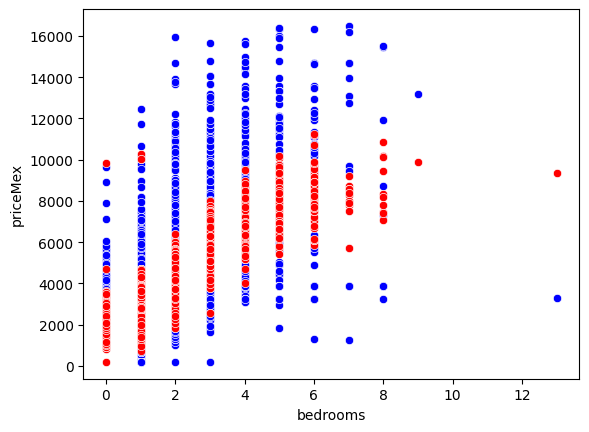

In [7051]:
# Gráfica de comparación
sns.scatterplot(x = 'bedrooms', y = 'priceMex', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'bedrooms', y = 'Predict_priceMex', color = "red", data = dfPredict)

## 9.- review_scores_value

In [7052]:
# Filtrando las correlaciones fuertes
reviewScoresModel = abs(df.corr()['review_scores_value'])
reviewScoresModel = reviewScoresModel[reviewScoresModel.abs() > 0.20].sort_values(ascending=False).to_frame()
reviewScoresModel

,review_scores_value
review_scores_value,1.000000
review_scores_rating,0.782805
review_scores_accuracy,0.681827
review_scores_communication,0.620258
review_scores_cleanliness,0.609799
review_scores_checkin,0.530755
review_scores_location,0.520629
host_is_superhost,0.262862
reviews_per_month,0.239557


<Axes: >

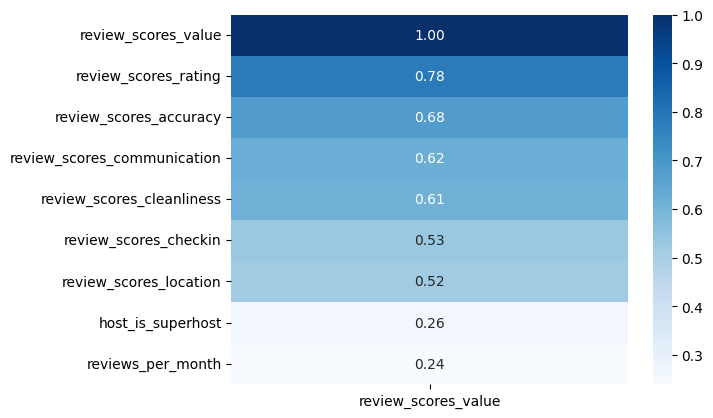

In [7053]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map9 = sns.heatmap(reviewScoresModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map9

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

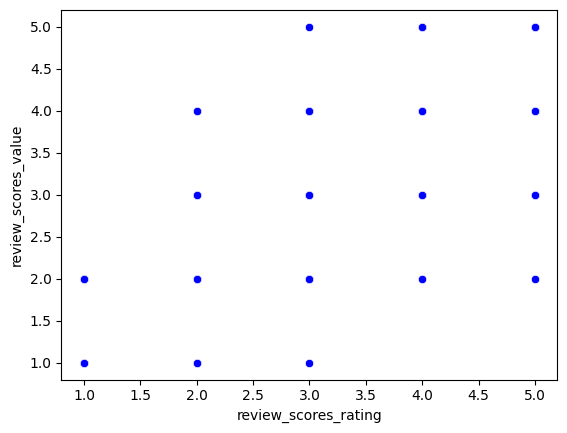

In [7054]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_rating', y = 'review_scores_value', color = 'blue', data = df)

In [7055]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["review_scores_rating","review_scores_accuracy","review_scores_communication","review_scores_cleanliness","review_scores_checkin","review_scores_location","host_is_superhost","reviews_per_month"]] # Independiente = x
Var_Dep = df[["review_scores_value"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_communication', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_location',
        'host_is_superhost', 'reviews_per_month'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([[0.51141292, 0.1695228 , 0.1202972 , 0.09489376, 0.10352814,
         0.12678789, 0.0401512 , 0.01192863]]),
 'rank_': 8,
 'singular_': array([137.56890984,  50.83389841,  38.66061554,  19.68836842,
         18.66129894,  16.34647513,  14.53958022,  12.50397814]),
 'intercept_': array([-0.7259512])}

## Modelo matemático: y = 0.51141292x1 + 0.1695228x2 + 0.1202972x3 + 0.09489376x4 + 0.10352814x5 + 0.12678789x6 + 0.0401512x7 + 0.01192863x8 - 0.7259512

In [7056]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["review_scores_rating","review_scores_accuracy","review_scores_communication","review_scores_cleanliness","review_scores_checkin","review_scores_location","host_is_superhost","reviews_per_month"]])
y_pred

array([[4.91675953],
       [4.96025074],
       [4.95404786],
       ...,
       [4.92749529],
       [4.92749529],
       [4.96764649]])

In [7057]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_ReviewScores', y_pred)
dfPredict

,Predict_ReviewScores,Predict_priceMex,Predict_Bedrooms,Predict_Accommodates,Predict_RoomType,Predict_Host_TotalListings,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,host_id,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,4.916760,2494.454259,0.553160,2.523960,0.325525,47.629533,0.269137,75.303643,-201326592.0,14942,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,4.960251,3112.362947,1.509807,2.088260,2.187455,45.338047,0.767231,84.734858,-201326592.0,30559,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,4.954048,4284.880575,1.584326,5.128764,0.161438,-16.108791,0.706407,85.302627,-201326592.0,31481,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,4.952497,3904.581895,1.154991,4.220345,0.228722,-55.868509,0.576015,84.563177,-201326592.0,31481,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,4.818645,3226.059502,1.465719,3.386162,0.169583,8.171024,0.142283,75.194646,-201326592.0,14942,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,4.967646,9882.063791,5.373250,10.866541,-0.295381,142.343767,0.422817,100.112028,377487360.0,398317720,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,4.927495,1409.330165,0.761942,1.644562,2.185233,112.104574,0.369334,96.258133,226492416.0,184675574,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,4.927495,4156.266191,1.750312,4.330302,0.149220,54.858573,0.454951,91.217834,520093696.0,584875397,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,4.927495,3609.911421,1.447602,1.956959,0.303781,182.587712,0.553343,89.408617,536870912.0,581629893,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7058]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_9 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_9 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6567425471964812

In [7059]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_9 = np.sqrt(coef_Deter_9)
coef_Correl_9 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.8103965370091861

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

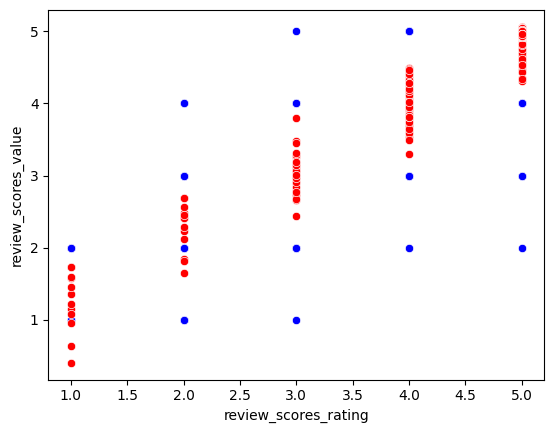

In [7060]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_rating', y = 'review_scores_value', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'review_scores_rating', y = 'Predict_ReviewScores', color = "red", data = dfPredict)

## 10.- reviews_per_month

In [7061]:
# Filtrando las correlaciones fuertes
reviewsMonthModel = abs(df.corr()['reviews_per_month'])
reviewsMonthModel = reviewsMonthModel[reviewsMonthModel.abs() > 0.20].sort_values(ascending=False).to_frame()
reviewsMonthModel

,reviews_per_month
reviews_per_month,1.000000
number_of_reviews_ltm,0.772211
number_of_reviews_l30d,0.610060
number_of_reviews,0.477304
minimum_nights_avg_ntm,0.412806
host_is_superhost,0.310284
host_acceptance_rate,0.241717
review_scores_value,0.239557
host_response_time_num,0.228831
review_scores_rating,0.209489


<Axes: >

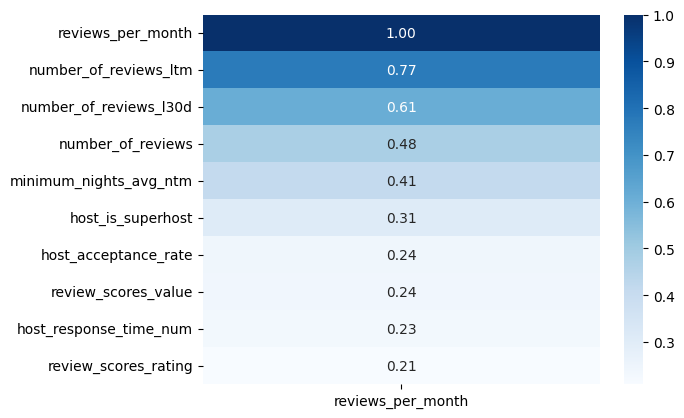

In [7062]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map10 = sns.heatmap(reviewsMonthModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map10

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

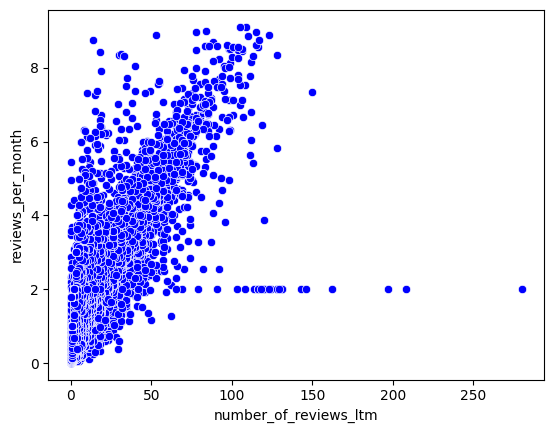

In [7063]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews_ltm', y = 'reviews_per_month', color = 'blue', data = df)

In [7064]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = df[["number_of_reviews_ltm","number_of_reviews_l30d","number_of_reviews","minimum_nights_avg_ntm","host_is_superhost","host_acceptance_rate","review_scores_value","host_response_time_num","review_scores_rating"]] # Independiente = x
Var_Dep = df[["reviews_per_month"]] # Dependiente = y

# Se define model con la función de regresión Lineal
model = LinearRegression()

# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews', 'minimum_nights_avg_ntm', 'host_is_superhost',
        'host_acceptance_rate', 'review_scores_value',
        'host_response_time_num', 'review_scores_rating'], dtype=object),
 'n_features_in_': 9,
 'coef_': array([[ 0.04705443,  0.06652157,  0.00116313, -0.00574201, -0.1170181 ,
          0.00112521,  0.35374291,  0.14904794,  0.06931126]]),
 'rank_': 9,
 'singular_': array([6835.2319061 , 1636.175096  , 1238.11846638,  868.90487732,
         134.19371688,   43.80595569,   36.29501929,   35.18202676,
          14.59301634]),
 'intercept_': array([-1.39874161])}

## Modelo matemático: y = 0.04705443x1 + 0.06652157x2 + 0.00116313x3 - 0.00574201x4 - 0.1170181x5 + 0.00112521x6 + 0.35374291x7 + 0.14904794x8 + 0.06931126x9 - 1.39874161

In [7065]:
# Predecimos los valores de "host_is_superhost" a partir de las variable "host_years" y "host_verifications_num"
y_pred = model.predict(X = df[["number_of_reviews_ltm","number_of_reviews_l30d","number_of_reviews","minimum_nights_avg_ntm","host_is_superhost","host_acceptance_rate","review_scores_value","host_response_time_num","review_scores_rating"]])
y_pred

array([[1.12502956],
       [2.06322683],
       [2.43155957],
       ...,
       [1.25604569],
       [1.2704518 ],
       [1.14599228]])

In [7066]:
# Insertamos la columna de preddiciones en el df

dfPredict.insert(0, 'Predict_ReviewsMonth', y_pred)
dfPredict

,Predict_ReviewsMonth,Predict_ReviewScores,Predict_priceMex,Predict_Bedrooms,Predict_Accommodates,Predict_RoomType,Predict_Host_TotalListings,Predict_SuperHost,Predict_Host_Acceptance,Predict_Host_id,...,number_of_reviews,reviews_per_month,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,1.125030,4.916760,2494.454259,0.553160,2.523960,0.325525,47.629533,0.269137,75.303643,-201326592.0,...,160.0,0.88,1.0,29.0,0,80,2,3,1936.04,2
1,2.063227,4.960251,3112.362947,1.509807,2.088260,2.187455,45.338047,0.767231,84.734858,-201326592.0,...,196.0,1.16,1.0,53.0,2,24,2,5,1486.26,4
2,2.431560,4.954048,4284.880575,1.584326,5.128764,0.161438,-16.108791,0.706407,85.302627,-201326592.0,...,97.0,0.64,3.0,63.0,0,18,2,3,3696.08,4
3,1.159810,4.952497,3904.581895,1.154991,4.220345,0.228722,-55.868509,0.576015,84.563177,-201326592.0,...,77.0,0.51,2.0,57.0,0,18,2,3,2444.50,4
4,1.003535,4.818645,3226.059502,1.465719,3.386162,0.169583,8.171024,0.142283,75.194646,-201326592.0,...,96.0,0.61,2.0,28.0,0,80,2,3,3265.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,1.147715,4.967646,9882.063791,5.373250,10.866541,-0.295381,142.343767,0.422817,100.112028,377487360.0,...,0.0,1.78,6.0,45.0,0,57,3,3,9406.44,1
6438,1.263585,4.927495,1409.330165,0.761942,1.644562,2.185233,112.104574,0.369334,96.258133,226492416.0,...,0.0,1.78,1.0,17.0,2,10,3,5,1603.59,0
6439,1.256046,4.927495,4156.266191,1.750312,4.330302,0.149220,54.858573,0.454951,91.217834,520093696.0,...,0.0,1.78,2.0,37.0,0,67,3,3,4341.43,4
6440,1.270452,4.927495,3609.911421,1.447602,1.956959,0.303781,182.587712,0.553343,89.408617,536870912.0,...,0.0,1.78,1.0,47.0,2,62,3,3,782.24,4


In [7067]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_10 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_10 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6187765896381794

In [7068]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_10 = np.sqrt(coef_Deter_10)
coef_Correl_10 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.7866235374295505

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

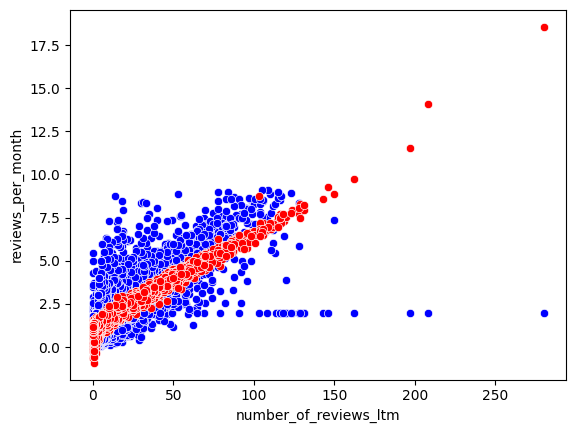

In [7069]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'reviews_per_month', color = 'blue', data = dfPredict)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'Predict_ReviewsMonth', color = "red", data = dfPredict)